# Entrega 1: Tarea 1. Parte 2.

**Asignatura**: Machine Learning, 2025/2026

**Profesora**: Raquel España

**Máster de Inteligencia Artificial**
**Autores:**  
- Jesús Guirado Pérez  
- Antonio Luis Sánchez Torres  
- Víctor Emilio Vicente García

# Índice
1. [Introducción](#introduccion)
   1. [Problema](#problema)
   2. [Metodología](#metodología)
2. [Dataset](#dataset)
3. [Preprocesado Básico]()
   1. [Tratamiento de nulos]()
   2. [Tratamiento de cadenas de texto]()
4. [Estrategias de Evaluación]()
5. [Modelos linea Base]()
   1. [Arbol de decision]()
   2. [Random Forest]()
   3. [AdaBoost]()
6. [Estrategias de preprocesado avanzado]()
   1. [Valores atípicos]()
7. [Entrenamiento con preprocesado]()
   1. [Arbol de decisión]()
   2. [Random Forest]()
   3. [AdaBoost]()
8. [Búsqueda de hyper parámetros]()
   1. [Arbol de decisión]()
   2. [Random Forest]()
   3. [AdaBoost]()
9.  [Selección de características e hyper parámetros]()
    1.  [Arbol de decisión]()
    2.  [Random Forest]()
    3.  [AdaBoost]()
10. [Comparativa de resultados final]()
11. [Conclusión]()
    
 [Uso de IA Generativa]()

 [Entorno de Ejecución]()

# Introducción <a name="introduction"></a>
La consejería de educación nos ha pedido realizar un análisis sobre la prevención del bullying. Tenemos como tarea crear un sistema fiable de predicción del bullyinng en base a dos datasets.

## Problema <a name="problema"></a>
Este problema es una continuación de la Parte 1, sigue siendo un problema de clasificación binaria entre dos clases, sufre bullying o no sufre bullying. En este caso la consegería nos ha dado un nuevo dataset con más datos. Además de generar un clasificador binario que ayude en la toma de decisiones y prevención del bullying, hay que generar un informe que puedan entender personal no técnico, subrallando entre otros las variables más importantes para resolver el problema.

## Metodología <a name="metodología"></a>
En este proyecto 

# Preprocesado Básico

## Lectura de datos y análisis superficial

Leeremos los datos del dataset descargado para la práctica y revisaremos superficialmente de cuantas filas, columnas, nulos y tipos tenga el dataset.

In [1]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Semilla establecida
semilla=123
np.random.seed(semilla)
RUTA_BASE_DATOS = './Bullying/'

# Cargamos la base de datos de bullying1.csv
# ==============================================================================
url1 = ( RUTA_BASE_DATOS + 'Bullying1.csv')
bullying1 = pd.read_csv(url1, sep=',')
# Damos un vistazo rápido sobre cómo está construido el dataset en las primeras 3 filas
bullying1.head(3)


,Edad,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Videojuegos,Tiempo_Redes,Actividades_Extracurr,Ausencias_Escolares,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Actividad_Fisica,Genero,Tipo_Centro,Sufre_Bullying
0,15.0,6.0,5.5,12.0,1.7,6.0,3,12,1.9,5.7,0.7,2,3.7,0.5,Femenino,Publico,No
1,16.0,6.8,5.2,2.0,3.4,0.9,3,10,8.6,8.7,9.4,9,5.8,6.6,Femenino,Publico,Si
2,14.0,8.5,3.5,9.0,0.5,6.1,4,0,8.8,4.7,6.2,1,6.2,1.5,Femenino,Privado,No


In [2]:
# Cargamos la base de datos de bullying2.csv
# ==============================================================================
url2 = ( RUTA_BASE_DATOS + 'Bullying2.csv')
bullying2 = pd.read_csv(url2, sep=',')
# Damos un vistazo rápido sobre cómo está construido el dataset en las primeras 3 filas
bullying2.head(3)

,Edad,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Videojuegos,Tiempo_Redes,Actividades_Extracurr,Ausencias_Escolares,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Actividad_Fisica,Genero,Tipo_Centro,Sufre_Bullying
0,15.0,6.0,5.5,12.0,1.7,6.0,3,12,1.9,5.7,0.7,2,3.7,0.5,Femenino,Publico,No
1,16.0,6.8,5.2,2.0,3.4,0.9,3,10,8.6,8.7,9.4,9,5.8,6.6,Femenino,Publico,Si
2,14.0,8.5,3.5,9.0,0.5,6.1,4,0,8.8,4.7,6.2,1,6.2,1.5,Femenino,Privado,No


In [3]:
# información del dataset mostrando el nombre de cada columna, su tipo, y de cuántas filas tiene el dataset y cada una de las variables, siendo con estas ultimas la cantidad de no nulas 
bullying2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   2387 non-null   float64
 1   Horas_Sueno            2512 non-null   float64
 2   Notas_Promedio         2512 non-null   float64
 3   Numero_Amigos          2387 non-null   float64
 4   Tiempo_Videojuegos     2512 non-null   float64
 5   Tiempo_Redes           2512 non-null   float64
 6   Actividades_Extracurr  2512 non-null   int64  
 7   Ausencias_Escolares    2512 non-null   int64  
 8   Autoestima             2512 non-null   float64
 9   Ansiedad               2512 non-null   float64
 10  Depresion              2512 non-null   float64
 11  Conflictos_Familiares  2512 non-null   int64  
 12  Tiempo_Internet        2512 non-null   float64
 13  Actividad_Fisica       2512 non-null   float64
 14  Genero                 2512 non-null   object 
 15  Tipo

Podemos ver como nuestra base de datos está constituida por 17 columnas y 2512 filas, y que las unicas variables con nulos son ``Edad`` y ``Numero_Amigos`` puesto que como podemos ver, tenemos 2512  entradas, de las cuales todas las variables tienen 2512  entradas no nulas, excepto las dos variables mencionadas, las cuales tienen 2387 entradas no nulas cada una, es decir, 125 nulos cada una. Nuestro dataset ahora tiene 512 nuvos datos aproximadamente un 25% más que el dataset anterior. Este ratio se mantiene en el número de nulos que aumenta en 25 muestras. Aunque no podemos asumir que simplemente han añadido más datos al dataset, una primera inspección con el comando diff nos demuestra que hay diferencias más profundas en los datos. Además de añadir filas nuevas algunos datos se han modificado, especialmente se ven cambios en las columnas `Numero_Amigos`,``Autoestima``,``Ansiedad`` o la columna objetivo ``Sufre_Bullying``. Durante esta inspección tambien hemos detectado un valor inusual en ``Ansiedad`` y ``Autoestima``, estas dos columnas en ocasiones presentan valores por encima de 10 que podrían ser un error ya que coinciden con demasiada precisión esos valores entre sí. Idealmente contrastaríamos esa información con la consegería pero en otra sección trateremos estos valores.

In [4]:
from collections import Counter

# Contamos los valores de cada clase de la variable objetivo
counter = Counter(bullying2["Sufre_Bullying"])
print(counter)

Counter({'No': 1304, 'Si': 1208})


Aquí se puede ver que el dataset está bastante balanceados suponiendo los casos donde no se sufre bullying el 52% y los casos en los que si el 48%. Por tanto no vamos a realizar técnicas de balanceo en este caso.

## Tratamiento de nulos


Como hemos hecho anteriormente  vamos a imputar la mediana en los valores nulos por ser mas robustos, tambien vamos a hacer lo mismo para los valores erroneos de ``Ansiedad`` y ``Autoestima``.

In [5]:
from sklearn.impute import SimpleImputer
# strategy=median porque utilizamos la mediana
imputer = SimpleImputer(strategy="median")
# seleccionamos las columnas con nulos, las cuales queremos calcular su mediana y sustituir los nulos por
nulos = ["Edad", "Numero_Amigos"]
# Sustituimos las columnas elegidas, calculando la mediana con fit y cambiando los nulos por con el valor de fit utilizando transform
bullying2[nulos] = imputer.fit_transform(bullying2[nulos])

Utilizando la misma estrategia que para los nulos ahora los valores de autoestima y Ansiedad si que están entre 0 y 10, en concreto hemos sustituido 125 valores de cada columna. 

## Tratamiento de columnas object con dummies

Al igual que con el primer dataset, vamos a reemplazar las columnas con valores de texto por nuevos valores numéricos para que los modelos de aprendizaje puedan procesarlos.

In [6]:
#Seleccionamos las columnas categóricas y las mostramos
categoricas_anterior = bullying1.select_dtypes(include = ["object", "category"]).columns

categoricas = bullying2.select_dtypes(include = ["object", "category"]).columns
categoricas

Index(['Genero', 'Tipo_Centro', 'Sufre_Bullying'], dtype='object')

In [7]:
#Transformamos las categóricas a dummies, eliminando la primera columna de cada variable categórica, haciendo que desaparezca la colinealidad, combinación lineal de varias columnas para formar otra.
categoricas_Datos_anterior = pd.get_dummies(bullying1[categoricas_anterior], drop_first = True)

categoricas_Datos = pd.get_dummies(bullying2[categoricas], drop_first = True)
# Mostramos la transformación de las variables categóricas en variables dummies
categoricas_Datos.head()

,Genero_Masculino,Tipo_Centro_Publico,Sufre_Bullying_Si
0,False,True,False
1,False,True,True
2,False,False,False
3,True,False,False
4,False,False,True


In [8]:
bullying1.drop(categoricas_anterior, axis = 1, inplace = True)
bullying1 = pd.concat([bullying1, categoricas_Datos_anterior], axis = 1)

bullying2.drop(categoricas, axis = 1, inplace = True)
# Tras eliminar los atributos originales, concatenamos los nuevos atributos creados para las variables categóricas.
bullying2 = pd.concat([bullying2, categoricas_Datos], axis = 1)
# Mostramos como quedan los datos de nuevo.
bullying2.head()

,Edad,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Videojuegos,Tiempo_Redes,Actividades_Extracurr,Ausencias_Escolares,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Actividad_Fisica,Genero_Masculino,Tipo_Centro_Publico,Sufre_Bullying_Si
0,15.0,6.0,5.5,12.0,1.7,6.0,3,12,1.9,5.7,0.7,2,3.7,0.5,False,True,False
1,16.0,6.8,5.2,2.0,3.4,0.9,3,10,8.6,8.7,9.4,9,5.8,6.6,False,True,True
2,14.0,8.5,3.5,9.0,0.5,6.1,4,0,8.8,4.7,6.2,1,6.2,1.5,False,False,False
3,16.0,9.2,6.8,4.0,2.5,0.9,0,21,3.0,9.3,7.3,9,0.0,3.6,True,False,False
4,16.0,6.6,7.6,2.0,4.5,9.6,4,29,8.2,2.1,6.8,4,7.4,0.4,False,False,True


In [9]:
bullying2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   2512 non-null   float64
 1   Horas_Sueno            2512 non-null   float64
 2   Notas_Promedio         2512 non-null   float64
 3   Numero_Amigos          2512 non-null   float64
 4   Tiempo_Videojuegos     2512 non-null   float64
 5   Tiempo_Redes           2512 non-null   float64
 6   Actividades_Extracurr  2512 non-null   int64  
 7   Ausencias_Escolares    2512 non-null   int64  
 8   Autoestima             2512 non-null   float64
 9   Ansiedad               2512 non-null   float64
 10  Depresion              2512 non-null   float64
 11  Conflictos_Familiares  2512 non-null   int64  
 12  Tiempo_Internet        2512 non-null   float64
 13  Actividad_Fisica       2512 non-null   float64
 14  Genero_Masculino       2512 non-null   bool   
 15  Tipo

Utilizando el mismo código que en la parte anterior hemos podido sustituir las variables de texto por booleanos.

## Varianza

In [10]:
# Calculamos la variedad de valores que hay en cada una de las columnas, cuanto mayor sea, mayor variedad y más grande sera su varianza
varianza_anterior = bullying1.var()

varianza = bullying2.var()
varianza

Edad                      2.844594
Horas_Sueno               2.994051
Notas_Promedio            8.460677
Numero_Amigos            17.542071
Tiempo_Videojuegos        2.924311
Tiempo_Redes              8.272878
Actividades_Extracurr     1.997570
Ausencias_Escolares      73.823079
Autoestima               46.520459
Ansiedad                 46.691234
Depresion                 8.534462
Conflictos_Familiares     8.181373
Tiempo_Internet          12.200729
Actividad_Fisica          4.146101
Genero_Masculino          0.250084
Tipo_Centro_Publico       0.250092
Sufre_Bullying_Si         0.249734
dtype: float64

In [11]:
diferencias = varianza - varianza_anterior
diferencias.sort_values(ascending=False)

Ansiedad                 0.609067
Notas_Promedio           0.218349
Conflictos_Familiares    0.216601
Tiempo_Redes             0.189679
Tiempo_Internet          0.174519
Depresion                0.066136
Horas_Sueno              0.053423
Sufre_Bullying_Si        0.021524
Tipo_Centro_Publico      0.000039
Genero_Masculino        -0.000025
Actividades_Extracurr   -0.001029
Actividad_Fisica        -0.031582
Tiempo_Videojuegos      -0.037252
Edad                    -0.107569
Autoestima              -0.460885
Ausencias_Escolares     -0.706634
Numero_Amigos           -0.804909
dtype: float64

Si comparamos los datos con el dataset anterior solo vemos grandes cambios en las variables de ``Ansiedad``, ``Numero_Amigos``, ``Ausencias_Escolares`` y ``Autoestima``. Aún así la variación no es demasiado grande entre 8 decimas y 4 decimas.

## Tabla de correlación

Vamos a continuación a estudiar como se relacionan las variables en el nuevo dataset y si hay algún valor destacable o diferente con el dataset anterior.

In [12]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes, para luego entrenar nuestro modelo e intentar predecir 
matriz_correlacion_anterior = bullying1.corr()
matriz_correlacion = bullying2.corr()
# Visualizaremos de mayor a menor
matriz_correlacion["Sufre_Bullying_Si"].sort_values(ascending=False)

Sufre_Bullying_Si        1.000000
Tiempo_Internet          0.256170
Conflictos_Familiares    0.124018
Notas_Promedio           0.121140
Ansiedad                 0.114457
Tiempo_Redes             0.057241
Depresion                0.036814
Actividad_Fisica         0.030802
Edad                     0.008165
Actividades_Extracurr    0.004119
Tiempo_Videojuegos      -0.006595
Tipo_Centro_Publico     -0.013332
Ausencias_Escolares     -0.015024
Genero_Masculino        -0.038550
Horas_Sueno             -0.040387
Autoestima              -0.052622
Numero_Amigos           -0.063355
Name: Sufre_Bullying_Si, dtype: float64

In [13]:
diferencias = matriz_correlacion["Sufre_Bullying_Si"].sort_values(ascending=False) - matriz_correlacion_anterior["Sufre_Bullying_Si"].sort_values(ascending=False)
diferencias.sort_values(ascending=False)

Conflictos_Familiares    0.042464
Tiempo_Internet          0.034054
Autoestima               0.023188
Horas_Sueno              0.013404
Actividad_Fisica         0.011442
Actividades_Extracurr    0.010104
Numero_Amigos            0.008062
Ansiedad                 0.006577
Tiempo_Redes             0.005197
Depresion                0.003881
Tiempo_Videojuegos       0.003546
Notas_Promedio           0.003061
Sufre_Bullying_Si        0.000000
Ausencias_Escolares     -0.002828
Tipo_Centro_Publico     -0.011271
Edad                    -0.022361
Genero_Masculino        -0.041029
Name: Sufre_Bullying_Si, dtype: float64

``Tiempo_Internet`` ha aumentado en 3 centesimas, ``Conflictos_Familiares`` ha aumentado en 4 centésimas y ha pasado de ser el cuarto valor a ser el segundo. Notas_Promedio y Ansiedad tambien han aumentado ligeramente. Los mayores cambios se ven en Conflictos_Familiares, Tiempo_Internet y Genero_Masculino que ahora está menos correlacionada que en el dataset anterior.

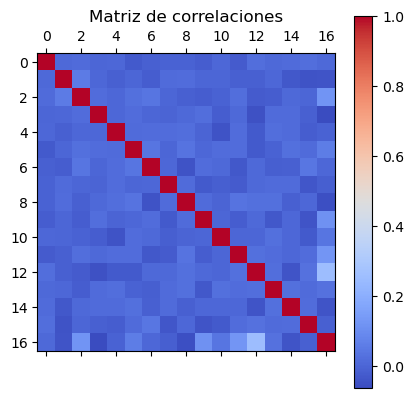

In [14]:
# Mediante un mapa de calor analizamos la matriz de correlación donde los colores van de azul a rojo, dependiendo del grado de correlación entre variables
plt.matshow(bullying2.corr(), cmap="coolwarm")
# Añadimos el título "Matriz de correlaciones"
plt.title("Matriz de correlaciones")
# Añadimos una barra de color como leyenda
plt.colorbar()
# Mostramos la gráfica
plt.show()

PrimeroEn cuanto aa la matríz de correlación no se ven apenas cambios con el anteriro, no se aprecian fuertes correlaciones entre ninguna variable con otro.

# 2. Entrenamiento Básico

Con este procesado básico ya podemos comparar los modelos que usamos en la parte anterior con esta. Vamos a utilizar la misma estratégia de elección de set de entrenamiento y de prueba para hacer una comparación coherente.

In [15]:
#Importamos varias librerias que podrían ayudarnos a la hora de seguir con nuestros modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold
#Dividimos en "X" todas las columnas menos la variable objetivo, y en "y" la característica objetivo
X=bullying2.drop("Sufre_Bullying_Si", axis=1)
y=bullying2["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

In [16]:
# Importamos la clase matriz confusión 
# Importación de los métodos requeridos
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Importante poner para que se muestren los gráficos
%matplotlib inline
# Definimos una función para utilizarla posteriormente

def obtencion_metricas_clasificacion(Entradas, modelo, Salidas_verdaderas, debug=True):
    '''Obtención de las métricas de clasificación'''
    # Salidas predichas por el modelo y las salidas verdaderas
    Salidas_predichas = modelo.predict(Entradas)
    # Matriz de confusión para visualizar aciertos y errores, ordenada primero con los falsos y segundo con los verdaderos
    labels = [False, True]
    matriz_confusion = confusion_matrix(Salidas_verdaderas, Salidas_predichas, labels=labels)
    if debug:
        print("La matriz de confusión es:")
        print(matriz_confusion)

    # Métricas que analizaremos en nuestros modelos
    exactitud = accuracy_score(Salidas_verdaderas, Salidas_predichas)
    precision = precision_score(Salidas_verdaderas, Salidas_predichas)
    sensibilidad_recall = recall_score(Salidas_verdaderas, Salidas_predichas)
    puntuacion_f1 = f1_score(Salidas_verdaderas, Salidas_predichas)

    # Cantidad de decimales que tendrá cada impresión
    digitos = 4
    if debug:
        print("La exactitud es: ")
        print(round(exactitud,digitos))
        print("La precisión es:")
        print(round(precision,digitos))
        print("La sensibilidad es:")
        print(round(sensibilidad_recall,digitos))
        print("La puntuación F1 es:")
        print(round(puntuacion_f1,digitos))
    return exactitud, precision, sensibilidad_recall, puntuacion_f1

## Decision Tree

In [17]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 17
Número de nodos terminales: 201


In [18]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
scoresDTBasico=obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[209  52]
 [ 45 197]]
La exactitud es: 
0.8072
La precisión es:
0.7912
La sensibilidad es:
0.814
La puntuación F1 es:
0.8024


### Comparación de Métricas

| Métrica         | Nuevos datos         |       Datos Anteriores |
|-----------------|----------------------|------------------------|
| **Exactitud**   | 0.8072               | **0.8300**             |
| **Precisión**   | **0.7912**           | 0.7589                 |
| **Sensibilidad**| **0.8140**           | 0.7589                 |
| **F1-Score**    | **0.8024**           | 0.7589                 |

Podemos ver que con los nuevos datos obtenemos mejores resultados en todas las métricas salvo en Exactitud, con estos datos podemos decir que el modelo con más datos predice más casos reales de bullying verdaderos positivos, esto se puede ver en números comparando las matrices de confusión, este modelo consigue 197 verdaderos positivos mientras que el modelo anterior predecía 107. Aunque ahora tengamos un 25% más de datos hemos detectado un 84% más de verdaderos positivos.

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
# ==============================================================================
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
scoresRFBasico = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[204  57]
 [ 24 218]]
La exactitud es: 
0.839
La precisión es:
0.7927
La sensibilidad es:
0.9008
La puntuación F1 es:
0.8433


### Comparación de Métricas

| Métrica         | Nuevos datos         |       Datos Anteriores |
|-----------------|----------------------|------------------------|
| **Exactitud**   | **0.839**            | 0.8275                 |
| **Precisión**   | **0.7927**           | 0.7857                 |
| **Sensibilidad**| **0.9008**           | 0.7021                 |
| **F1-Score**    | **0.8433**           | 0.7416                 |

En este caso todos las métricas son mejores a las obtenidas con el set de datos anterior, destaca mucho la sensibilidad ahora predecimos 218 verdaderos positivos con un 90% de sensibilidad, lo cual a priori es una muy buena métrica.

## AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
scoresAdaBasico =  obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[207  54]
 [ 47 195]]
La exactitud es: 
0.7992
La precisión es:
0.7831
La sensibilidad es:
0.8058
La puntuación F1 es:
0.7943


### Comparación de Métricas

| Métrica         | Nuevos datos         |       Datos Anteriores |
|-----------------|----------------------|------------------------|
| **Exactitud**   | 0.7992               | **0.8225**             |
| **Precisión**   | **0.7831**           | 0.7431                 |
| **Sensibilidad**| **0.8058**           | 0.7589                 |
| **F1-Score**    | **0.7943**           | 0.7509                 |

En este caso volvemos a mejorar la sensibilidad pero en la exactitud conseguimos una métrica peor. 

En general podemos decir que los modelos se adaptan mejor al nuevo dataset. Esto sin realizar ningún cambio importante sobre el dataset. En la siguiente sección realizaremos un preprocesado mayor sobre el dataset para intentar obtener mejores resultados.

# 3. Preprocesado Extendido

## Valores atípicos

En estas gráficas podemos ver lo que sospechabamos en la columna Autoestima y Ansiedad, vamos a tratar esos valores como nulos e imputarlos con la mediana, parece intuitivo que todos los valores en esas dos columnas sean entre 0 y 10 como en Notas_Promedio, Depresión, etc.

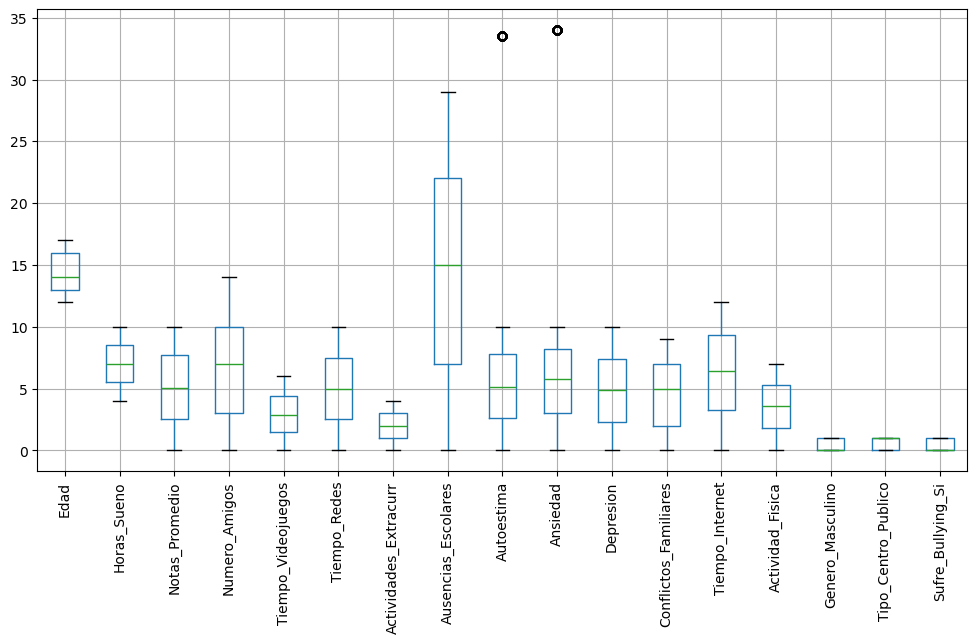

In [21]:
# Aumenta el tamaño del boxplot de la figura
bullying2.boxplot(figsize=(12,6))
# Rotamos los nombres en el eje x a 90º
plt.xticks(rotation=90)
# Muestra la gráfica
plt.show()

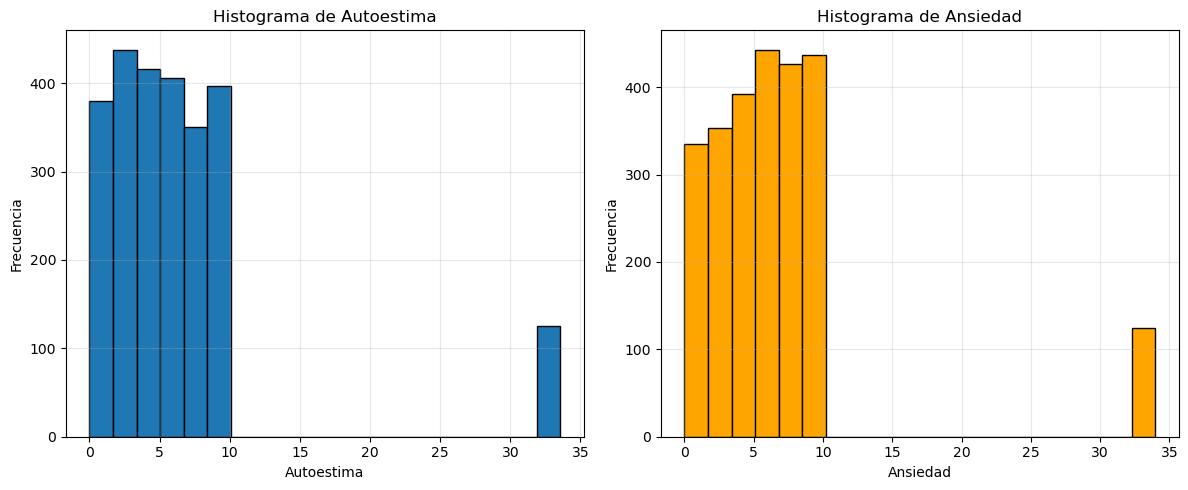

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Histograma de Autoestima
plt.subplot(1,2,1)
plt.hist(bullying2['Autoestima'], bins=20, edgecolor='black')
plt.title("Histograma de Autoestima")
plt.xlabel("Autoestima")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)

# Histograma de Ansiedad
plt.subplot(1,2,2)
plt.hist(bullying2['Ansiedad'], bins=20, edgecolor='black', color='orange')
plt.title("Histograma de Ansiedad")
plt.xlabel("Ansiedad")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Como se miestra en los histogramas hay un valor que se sale de lo esperado. Mirando el dataset podemos comprobar que para Autoestima el valor es "33.557282403870644" en los 125 datos en los que aparece, y para Ansiedad es "33.97737557364086". Estos datos parecen erroneos, idealente contactaríamos con consegería para aclarar que es este dato. Parece claramente que no debería de estar en nuestro dataset, podría representar nulos o podría representar 10. Vamos a tratarlos como nulos e imputarlos con la mediana que es el valor más fiable. Esto podría incluir un sesgo si luego esos datos son valores muy distintos a la mediana.

<Axes: >

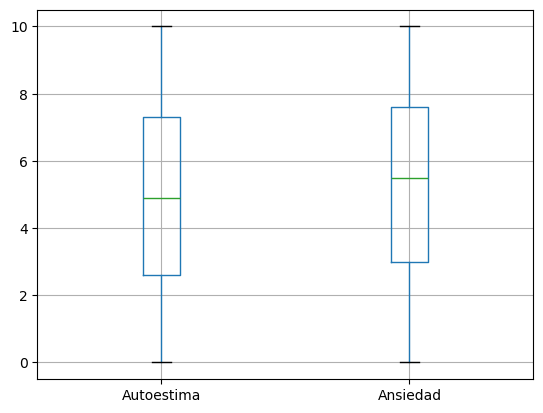

In [23]:
bullying2.loc[bullying2['Autoestima'] > 10, 'Autoestima'] = np.nan
bullying2.loc[bullying2['Ansiedad'] > 10, 'Ansiedad'] = np.nan
nulos = ["Autoestima", "Ansiedad"]
bullying2[nulos] = imputer.fit_transform(bullying2[nulos])
bullying2.boxplot(['Autoestima', 'Ansiedad'])


Ahora podemos ver que esas columnnas están entre 0 y 10, comparemos como ha afectado esto a la correlación.

In [24]:
matriz_correlacion_outliers = bullying2.corr()
# Visualizaremos de mayor a menor
matriz_correlacion_outliers["Sufre_Bullying_Si"].sort_values(ascending=False)

Sufre_Bullying_Si        1.000000
Ansiedad                 0.353223
Tiempo_Internet          0.256170
Conflictos_Familiares    0.124018
Notas_Promedio           0.121140
Tiempo_Redes             0.057241
Depresion                0.036814
Actividad_Fisica         0.030802
Edad                     0.008165
Actividades_Extracurr    0.004119
Tiempo_Videojuegos      -0.006595
Tipo_Centro_Publico     -0.013332
Ausencias_Escolares     -0.015024
Genero_Masculino        -0.038550
Horas_Sueno             -0.040387
Numero_Amigos           -0.063355
Autoestima              -0.160404
Name: Sufre_Bullying_Si, dtype: float64

Podemos ver como esto ha cambiado mucho la correlación de los valores de Ansiedad y Autoestima con la variable objetivo, tanto en positivo Ansiedad como en negativo Autoestima.

In [25]:
diferencia = matriz_correlacion_outliers["Sufre_Bullying_Si"] - matriz_correlacion["Sufre_Bullying_Si"]
diferencia[["Ansiedad", "Autoestima"]]

Ansiedad      0.238766
Autoestima   -0.107781
Name: Sufre_Bullying_Si, dtype: float64

Ansiedad ha aumentado su correlación en 2 decimas, meintras que autoestima ha aumentado su correlación inversa en una decima. Ahora son las primera y tercera variable más correlacionada con la variable objetivo. Ademas de Tiempo_Internet, Conflictos_Familiares y Notas_Promedio. Esto nos reafirma en la sensación de que los valores estaban mal indicados y que realmente deberían de estar entre 0 y 10.

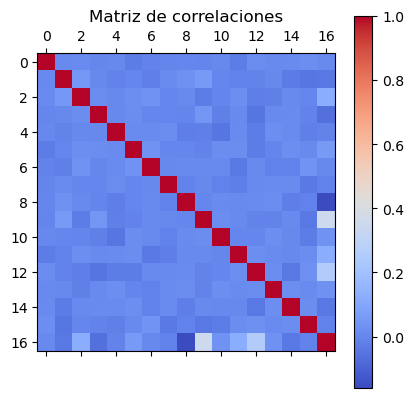

In [26]:
# Mediante un mapa de calor analizamos la matriz de correlación donde los colores van de azul a rojo, dependiendo del grado de correlación entre variables
plt.matshow(bullying2.corr(), cmap="coolwarm")
# Añadimos el título "Matriz de correlaciones"
plt.title("Matriz de correlaciones")
# Añadimos una barra de color como leyenda
plt.colorbar()
# Mostramos la gráfica
plt.show()

Se puede ver ahora que la variable más negativamente relacionada con la variable objetivo ahora aparece en un azul más oscuro igual que la variable más positivamente correlacionada ha cambiado. Se corresponden con Autoestima y Ansiedad.

## Decision Tree

In [27]:
X =bullying2.drop("Sufre_Bullying_Si", axis=1)
y =bullying2["Sufre_Bullying_Si"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)


In [28]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 15
Número de nodos terminales: 205


In [29]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
scoresDTOutliers=obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[204  57]
 [ 44 198]]
La exactitud es: 
0.7992
La precisión es:
0.7765
La sensibilidad es:
0.8182
La puntuación F1 es:
0.7968


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
# ==============================================================================
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
scoresRFOutliers = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[207  54]
 [ 22 220]]
La exactitud es: 
0.8489
La precisión es:
0.8029
La sensibilidad es:
0.9091
La puntuación F1 es:
0.8527


### Comparación de Métricas

| Métrica         | Nuevos datos         |       Datos Anteriores |
|-----------------|----------------------|------------------------|
| **Exactitud**   | **0.839**            | 0.8275                 |
| **Precisión**   | **0.7927**           | 0.7857                 |
| **Sensibilidad**| **0.9008**           | 0.7021                 |
| **F1-Score**    | **0.8433**           | 0.7416                 |

En este caso todos las métricas son mejores a las obtenidas con el set de datos anterior, destaca mucho la sensibilidad ahora predecimos 218 verdaderos positivos con un 90% de sensibilidad, lo cual a priori es una muy buena métrica.

## AdaBoost

In [31]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
scoresAdaOutliers =  obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[206  55]
 [ 41 201]]
La exactitud es: 
0.8091
La precisión es:
0.7852
La sensibilidad es:
0.8306
La puntuación F1 es:
0.8072


## Selección de características

La variables con la correlación más baja serían ``Edad``, ``Actividades_Extracurr`` y ``Tiempo_Videojuegos``. Estas variable no parecen aportar demasiada diferenciación a nuestro dataset. `Actividades_Extracurr` coincide siendo una de las variables menos correlacionadas en el dataset anterior, mientras que ``Edad`` y `Tiempo_Videojuegos`, aunque no eran las menos correlacionadas tampoco tenian un gran peso. Aun así vamos a ver con una eliminación recursiva de características cuales son las más importantes. A priorí descartariamos las de menor corelación y nos quedaríamos con las de mayor correlación. Pero vamos a validarlo con el método de reducción recursiva de características. 

In [32]:
rf = RandomForestClassifier(random_state=semilla)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
accuracy, precision, recall, f1 = obtencion_metricas_clasificacion(X_test, rf, y_test, debug=False)
print("Sensibilidad:", recall)

Sensibilidad: 0.9214876033057852


In [34]:
importancias = pd.DataFrame({
    "Característica": X.columns,
    "Importancia": rf.feature_importances_
})
importancias.sort_values(by="Importancia", ascending=False)


,Característica,Importancia
9,Ansiedad,0.215209
12,Tiempo_Internet,0.143028
8,Autoestima,0.103528
2,Notas_Promedio,0.078336
5,Tiempo_Redes,0.068643
11,Conflictos_Familiares,0.062271
1,Horas_Sueno,0.057107
3,Numero_Amigos,0.054553
10,Depresion,0.049602
13,Actividad_Fisica,0.040306


Para este Random Forest podemos ver que las 3 características más importantes han sido ``Ansiedad``, ``Tiempo_Internet``, ``Autoestima`` y las 3 características menos importantes han sido ``Actividades_Extracurr``, ``Tipo_Centro_Publico``,``Genero_Masculino``. Las más importantes presentaban un alto nivel de correlación con la variable objetivo mientrsa que las menos correlacionadas mostraban poca correlación, Aún así por ejemplo Edad no entra en el top 3 menos importantes y si que estaba en las menos correlacionadas.

A continuación vamos a hacer un pipeline que elimine recursivamente características y evalue con una validación cruzada los resultados hasta quedarse con una característica, pintaremos el resultado de sensibilidad para cada conjunto de características y así poder ver en que punto nuestro modelo empieza a fallar drasticamente. Con esto podríamos elegir mediante el método del codo el número de variables relevantes para entrenamiento. Este método nos permite comparar visualmente el resultado con cada cantidad de características y elegir en base a eso el número de características que nos parezca más equilibrado.

Características: 1, Sensibilidad: 0.6263, Exactitud: 0.6804
Características: 2, Sensibilidad: 0.6749, Exactitud: 0.6720
Características: 3, Sensibilidad: 0.7353, Exactitud: 0.7400
Características: 4, Sensibilidad: 0.7695, Exactitud: 0.7383
Características: 5, Sensibilidad: 0.8119, Exactitud: 0.7768
Características: 6, Sensibilidad: 0.8271, Exactitud: 0.7999
Características: 7, Sensibilidad: 0.8403, Exactitud: 0.8241
Características: 8, Sensibilidad: 0.9138, Exactitud: 0.8754
Características: 9, Sensibilidad: 0.9282, Exactitud: 0.8807
Características: 10, Sensibilidad: 0.9227, Exactitud: 0.8819
Características: 11, Sensibilidad: 0.9235, Exactitud: 0.8815
Características: 12, Sensibilidad: 0.9210, Exactitud: 0.8797
Características: 13, Sensibilidad: 0.9217, Exactitud: 0.8804
Características: 14, Sensibilidad: 0.9165, Exactitud: 0.8774
Características: 15, Sensibilidad: 0.9076, Exactitud: 0.8731
Características: 16, Sensibilidad: 0.9231, Exactitud: 0.8810


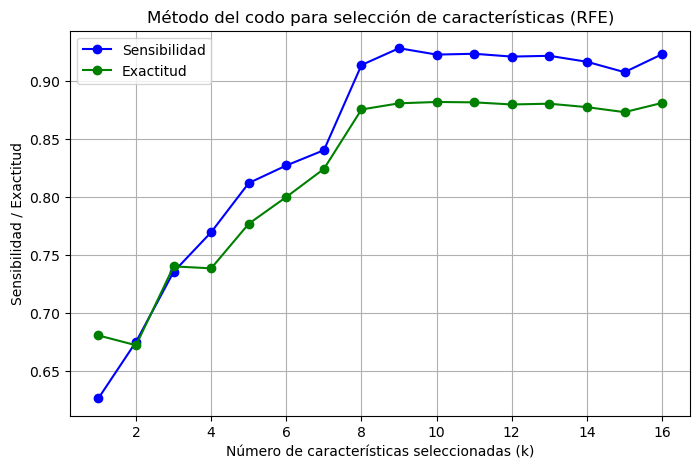

In [36]:

resultados_recall = []
resultados_accuracy = []
num_features = []

# Número total de características
total_features = X_train.shape[1]

# Evaluamos desde 1 hasta todas las características
for k in range(1, total_features + 1):

    # RFE seleccionando k características
    rfe = RFE(RandomForestClassifier(random_state=semilla),
              n_features_to_select=k)

    # Pipeline: RFE + random forest
    model = RandomForestClassifier(random_state=semilla)
    pipeline = Pipeline([('rfe', rfe), ('model', model)])

    # Validación cruzada
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=semilla)
    scores = cross_validate(pipeline, X_train, y_train, scoring=['recall','accuracy'], cv=cv, n_jobs=-1)
    resultados_recall.append(np.mean(scores['test_recall']))
    resultados_accuracy.append(np.mean(scores['test_accuracy']))
    num_features.append(k)

    print(f"Características: {k}, Sensibilidad: {np.mean(scores['test_recall']):.4f}, Exactitud: {np.mean(scores['test_accuracy']):.4f}")
# --- Gráfica del método del codo ---
plt.figure(figsize=(8,5))
plt.plot(num_features, resultados_recall, color='blue', marker='o')
plt.plot(num_features, resultados_accuracy, color='green', marker='o')
plt.xlabel("Número de características seleccionadas (k)")
plt.ylabel("Sensibilidad / Exactitud")
plt.legend(["Sensibilidad", "Exactitud"])
plt.title("Método del codo para selección de características (RFE)")
plt.grid(True)
plt.show()

En la gráfica se puede ver que en 8 características hay un salto de más de un 5% en y despues de esto el resto de variable sno añaden tanta discriminación ni en Precisión ni en Sensibilidad
Como podemos ver con 9 características conseguimos el mejor resultado de sensibilidad. De ahí en adelante incluso los resultados dejan de mejorar y se estancan. Entre 8 y 12 características podría ser suficiente para entrenar un buen modelo que generalice y sin añadir ruido de características poco relevantes. Vamos por tanto a elegir 9 características para nuestro entrenamiento. Veamos cuales son esas características y filtremos nuestro dataset para usarlas.

In [ ]:
n_features_to_select = 9
rfe = RFE(RandomForestClassifier(random_state=semilla), n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)


from operator import itemgetter
features = X_train.columns.to_list()
columns_selected = []
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    if x == 1:
        columns_selected.append(y)
    print(x, y)

1 Horas_Sueno
1 Notas_Promedio
1 Numero_Amigos
1 Tiempo_Redes
1 Autoestima
1 Ansiedad
1 Depresion
1 Conflictos_Familiares
1 Tiempo_Internet
1 Actividad_Fisica
2 Tiempo_Videojuegos
3 Ausencias_Escolares
4 Edad
5 Actividades_Extracurr
6 Tipo_Centro_Publico
7 Genero_Masculino


Vemos que las seis variables descartadas son ``Genero_Masculino``, ``Tipo_Centro_Publico``, ``Actividades_Extracurr``, ``Edad``, ``Ausencias_Escolares``, ``Tiempo_Videojuegos``.  Estas coinciden tambien con las características menos correlacionadas.

In [38]:
bullying2_seleccion = bullying2[columns_selected + ['Sufre_Bullying_Si']]
bullying2_seleccion.head()

,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Redes,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Actividad_Fisica,Sufre_Bullying_Si
0,6.0,5.5,12.0,6.0,1.9,5.7,0.7,2,3.7,0.5,False
1,6.8,5.2,2.0,0.9,8.6,8.7,9.4,9,5.8,6.6,True
2,8.5,3.5,9.0,6.1,8.8,4.7,6.2,1,6.2,1.5,False
3,9.2,6.8,4.0,0.9,3.0,9.3,7.3,9,0.0,3.6,False
4,6.6,7.6,2.0,9.6,8.2,2.1,6.8,4,7.4,0.4,True


## Entrenamiento de modelos después de aplicar selección de características

Ahora vamos a entrenar los modelos que utilizamos con el primer dataset pero utilizando nuestra nueva selección y preprocesado de las características para el nuevo dataset y compararemos los resultados. Primero realizaremos la misma división entre train y test con la semilla.

In [39]:
from sklearn.model_selection import train_test_split
X=bullying2_seleccion.drop("Sufre_Bullying_Si", axis=1)
y=bullying2_seleccion["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

## Decision Tree

In [40]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")
scoresDTSeleccion = obtencion_metricas_clasificacion(X_test, treeC, y_test)

Profundidad del árbol: 15
Número de nodos terminales: 214
La matriz de confusión es:
[[200  61]
 [ 45 197]]
La exactitud es: 
0.7893
La precisión es:
0.7636
La sensibilidad es:
0.814
La puntuación F1 es:
0.788



| Métrica| Nuevos datos Preprocesado |Nuevos datos sin preprocesado | Datos anteriores preprocesado|
|-----------------|---------|----------------------|------------------------|
| **Exactitud**   |0.7893   |0.8072                | **0.8375**             |
| **Precisión**   |0.7636   | **0.7912**           | 0.7714                 |
| **Sensibilidad**|**0.814**| **0.8140**           | 0.766                  |
| **F1-Score**    |0.788    | **0.8024**           | 0.7687                 |

Podemos ver que con el dataset anterior se conseguia una mejor exactitud, mientras que con el preprocesado todas las métricas empeoran salvo la Sensibilidad. Esto se puede dar a la reducción de características. Ya que las hemos realizado atendiendo al resultado de Random Forest y no de Decision Tree.

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
# ==============================================================================
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
scoresRFSeleccion = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[202  59]
 [ 18 224]]
La exactitud es: 
0.8469
La precisión es:
0.7915
La sensibilidad es:
0.9256
La puntuación F1 es:
0.8533



| Métrica| Nuevos datos Preprocesado |Nuevos datos sin preprocesado | Datos anteriores preprocesado|
|-----------------|----------|----------------------|------------------------|
| **Exactitud**   |**0.8469**    |0.839                | 0.8075                 |
| **Precisión**   |0.7915    | **0.7927**           | 0.7581                 |
| **Sensibilidad**|**0.9256**| 0.9008           | 0.6667                 |
| **F1-Score**    |**0.8533**    | 0.8433           | 0.7094                 |

En este caso vemos un aumento significativo en la métrica de Sensibilidad con respecto al resultado con el dataset anterior, tambien podemos ver que mejora en casi todas las métricas al modelo que no selecciona características. La selección de características la hemos hecho en base a este modelo, por eso podemos ver que es el que mejor se adapta a el. 

## AdaBoost

In [42]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
scoresAdaSeleccion = obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[203  58]
 [ 47 195]]
La exactitud es: 
0.7913
La precisión es:
0.7708
La sensibilidad es:
0.8058
La puntuación F1 es:
0.7879


| Métrica| Nuevos datos Preprocesado |Nuevos datos sin preprocesado | Datos anteriores preprocesado|
|-----------------|--------------|----------------------|------------------------|
| **Exactitud**   |0.7913    |0.7992                | **0.8325**                 |
| **Precisión**   |0.7708        | **0.7831**           | 0.7467                 |
| **Sensibilidad**|**0.8058**   | 0.8057           | 0.7943                 |
| **F1-Score**    |0.7879    |  **0.7942**           | 0.7698                 |

En este caso el resultado está muy equilibrado el resultado pero, la selección de categorías y corrección de outliers no parece afectar mucho al resultado de AdaBoost. 

# Pipeline con validación cruzada

Hasta ahora, como en la parte anterior, hemos utilizado solo una validación apartir de una semilla(salvo en la elección de parámetros). Vamos ahora a introducir validación cruzada, de este modo añadimos aletoriedad y no dependemos solo de la semilla que utilizamos. Vamos a realizar una validación cruzada con 5 pliegues, nos fijaremos pricnipalmente en la Sensibilidad como hasta ahora, pero tambien mostraremos las demás métricas.

In [43]:
from sklearn.model_selection import cross_validate

def print_scores(scores, digitos=4):
        print("La exactitud es: ")
        print(round(scores['test_accuracy'].mean(),digitos))
        print("La precisión es:")
        print(round(scores['test_precision'].mean(),digitos))
        print("La sensibilidad es:")
        print(round(scores['test_recall'].mean(),digitos))
        print("La puntuación F1 es:")
        print(round(scores['test_f1'].mean(),digitos))

dtc=DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )

# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(dtc, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos la media
print_scores(scores)



La exactitud es: 
0.8168
La precisión es:
0.8192
La sensibilidad es:
0.795
La puntuación F1 es:
0.8067


Con la validación cruzada hemos mejorado en exactitud y precisión pero hemos empeorado en sensibilidad y F1. Ahora se estudian las métricas apartir de 5 ejecuciones de datos de entrada y salida, es una métrica más fiable y no tan dependiente de la semilla que utilizemos para la partición de datos de entrenamiento y validación. Esto nos indica que nuestra semilla funcionaba bien para la partición.

## Random Forest

In [44]:
# Importamos las librerías pipeline y cross_val_score
from sklearn.model_selection import cross_validate

rfc=RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        max_depth=None,
        class_weight='balanced',
        random_state=semilla
    )

# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(rfc, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos la media
print_scores(scores)


La exactitud es: 
0.8835
La precisión es:
0.847
La sensibilidad es:
0.9255
La puntuación F1 es:
0.8843


En este caso hemos mejorado ligeramente los resultados con la validación en una única partición de entrenamiento y validación

# AdaBoost

In [45]:
from sklearn.model_selection import cross_validate

adc=AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(adc, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos la media
print_scores(scores)

La exactitud es: 
0.8118
La precisión es:
0.8139
La sensibilidad es:
0.7898
La puntuación F1 es:
0.8014


En este caso la validación cruzada mejora en todos los parámetros menos en el que más nos interesa la sensibilidad.

# Búsqueda de hiperparámetros

Ahora que ya hemos definido la estrategia de preprocesado, selección de características y la estrategia de validación, podemos pasar a la búsqueda de hiperparámetros en nuestros modelos finales y comparar los resultados.

## Decision Tree

In [46]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_tree = {
    'criterion': ['gini', 'entropy'],           # Función para medir la impureza
    'max_depth': randint(3, 16),                # Profundidad del árbol entre 3 y 16
    'min_samples_split': randint(2, 16),        # Número mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12),         # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]      # Número de features considerados en cada split
}

dtc=DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
grid_tree = RandomizedSearchCV(
    dtc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_tree,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_tree.fit(X_train, y_train)
print("Mejores parámetros:", grid_tree.best_params_)

# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_tree.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
print("Resultados en el conjunto de test:")
scoresDTGridSearch = obtencion_metricas_clasificacion(X_test, grid_tree.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 8}
Resultados en el conjunto de entrenamiento:
La exactitud es: 
0.8611
La precisión es:
0.8276
La sensibilidad es:
0.8996
La puntuación F1 es:
0.8617
Resultados en el conjunto de test:
La matriz de confusión es:
[[205  56]
 [ 21 221]]
La exactitud es: 
0.8469
La precisión es:
0.7978
La sensibilidad es:
0.9132
La puntuación F1 es:
0.8516


# Random Forest

In [47]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_rf = {
    'n_estimators': randint(50, 500),         # número de árboles aleatorio entre 50 y 500
    'max_depth': randint(3,16),                # profundidad máxima entre 3 y 16
    'max_features': ['sqrt', 'log2', None],    # estrategia de selección de features
    'criterion': ['gini', 'entropy'],          # función para medir la impureza
    'min_samples_split': randint(2, 16),       # mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12)         # mínimo de muestras por hoja
}

rfc=RandomForestClassifier(
        n_estimators=100,           # Número de árboles de decision que forman Random Forest
        criterion='gini',           # Función de impureza
        max_depth=None,             # Profundidad máxima
        class_weight='balanced',    # Penaliza más los errores de la clase minoritaria (Opcional)
        random_state=semilla
    )
grid_rfc = RandomizedSearchCV(
    rfc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_rf,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_rfc.fit(X_train, y_train)
print("Mejores parámetros:", grid_rfc.best_params_)

# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_rfc.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
print("Resultados en el conjunto de test:")
scoresRFGridSearch = obtencion_metricas_clasificacion(X_test, grid_rfc.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 351}
Resultados en el conjunto de entrenamiento:
La exactitud es: 
0.886
La precisión es:
0.8336
La sensibilidad es:
0.9534
La puntuación F1 es:
0.8894
Resultados en el conjunto de test:
La matriz de confusión es:
[[202  59]
 [  7 235]]
La exactitud es: 
0.8688
La precisión es:
0.7993
La sensibilidad es:
0.9711
La puntuación F1 es:
0.8769


# AdaBoost

In [48]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_ab = {
    # Parámetros de cada árbol de decisión que estarán anidados dentro al AdaBoost, en el cual serán mas simples que el modelo de árbol de decisión
    'estimator__max_depth': randint(3, 7),            # Profundidad del árbol entre 3 y 7
    'estimator__min_samples_split': randint(2, 9),    # Número mínimo de muestras para dividir
    'estimator__criterion': ['gini', 'entropy'],      # Función para medir la impureza

    # Parámetros del propio AdaBoost
    'n_estimators': randint(50, 250),                 # Cantidaad de árboles de decisión que utilizará AdaBoost
    'learning_rate': uniform(0.01, 1.0)               # Controla la fuerza de corrección
}

abc=AdaBoostClassifier(
    estimator = dtc, learning_rate = 1.0, n_estimators=50, random_state=semilla
)
grid_ab = RandomizedSearchCV(
    abc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_ab,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_ab.fit(X_train, y_train)
print("Mejores parámetros:", grid_ab.best_params_)

# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_ab.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos la media
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
print("Resultados en el conjunto de test:")
scoresAdaGridSearch = obtencion_metricas_clasificacion(X_test, grid_ab.best_estimator_, y_test)

Mejores parámetros: {'estimator__criterion': 'entropy', 'estimator__max_depth': 5, 'estimator__min_samples_split': 8, 'learning_rate': 0.1630705151247731, 'n_estimators': 90}
Resultados en el conjunto de entrenamiento:
La exactitud es: 
0.8785
La precisión es:
0.8407
La sensibilidad es:
0.9223
La puntuación F1 es:
0.8795
Resultados en el conjunto de test:
La matriz de confusión es:
[[202  59]
 [ 21 221]]
La exactitud es: 
0.841
La precisión es:
0.7893
La sensibilidad es:
0.9132
La puntuación F1 es:
0.8467


## Grid Search sin reducción de características

In [49]:
X=bullying2.drop("Sufre_Bullying_Si", axis=1)
y=bullying2["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

## Decision Tree

In [50]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_tree = {
    'criterion': ['gini', 'entropy'],           # Función para medir la impureza
    'max_depth': randint(3, 16),                # Profundidad del árbol entre 3 y 16
    'min_samples_split': randint(2, 16),        # Número mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12),         # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]      # Número de features considerados en cada split
}

dtc=DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
grid_tree = RandomizedSearchCV(
    dtc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_tree,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_tree.fit(X_train, y_train)
print("Mejores parámetros:", grid_tree.best_params_)

# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_tree.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
print("Resultados en el conjunto de test:")
scoresDTGridSearchSinRed = obtencion_metricas_clasificacion(X_test, grid_tree.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 14}
Resultados en el conjunto de entrenamiento:
La exactitud es: 
0.8651
La precisión es:
0.831
La sensibilidad es:
0.9037
La puntuación F1 es:
0.8656
Resultados en el conjunto de test:
La matriz de confusión es:
[[204  57]
 [ 26 216]]
La exactitud es: 
0.835
La precisión es:
0.7912
La sensibilidad es:
0.8926
La puntuación F1 es:
0.8388


# Random Forest

In [51]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_rf = {
    'n_estimators': randint(50, 500),         # número de árboles aleatorio entre 50 y 500
    'max_depth': randint(3,16),                # profundidad máxima entre 3 y 16
    'max_features': ['sqrt', 'log2', None],    # estrategia de selección de features
    'criterion': ['gini', 'entropy'],          # función para medir la impureza
    'min_samples_split': randint(2, 16),       # mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12)         # mínimo de muestras por hoja
}

rfc=RandomForestClassifier(
        n_estimators=100,           # Número de árboles de decision que forman Random Forest
        criterion='gini',           # Función de impureza
        max_depth=None,             # Profundidad máxima
        class_weight='balanced',    # Penaliza más los errores de la clase minoritaria (Opcional)
        random_state=semilla
    )
grid_rfc = RandomizedSearchCV(
    rfc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_rf,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_rfc.fit(X_train, y_train)
print("Mejores parámetros:", grid_rfc.best_params_)

# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_rfc.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
print("Resultados en el conjunto de test:")
scoresRFGridSearchSinRed = obtencion_metricas_clasificacion(X_test, grid_rfc.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 351}
Resultados en el conjunto de entrenamiento:
La exactitud es: 
0.8845
La precisión es:
0.8325
La sensibilidad es:
0.9513
La puntuación F1 es:
0.8879
Resultados en el conjunto de test:
La matriz de confusión es:
[[201  60]
 [  7 235]]
La exactitud es: 
0.8668
La precisión es:
0.7966
La sensibilidad es:
0.9711
La puntuación F1 es:
0.8752


# AdaBoost

In [52]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_ab = {
    # Parámetros de cada árbol de decisión que estarán anidados dentro al AdaBoost, en el cual serán mas simples que el modelo de árbol de decisión
    'estimator__max_depth': randint(3, 7),            # Profundidad del árbol entre 3 y 7
    'estimator__min_samples_split': randint(2, 9),    # Número mínimo de muestras para dividir
    'estimator__criterion': ['gini', 'entropy'],      # Función para medir la impureza

    # Parámetros del propio AdaBoost
    'n_estimators': randint(50, 250),                 # Cantidaad de árboles de decisión que utilizará AdaBoost
    'learning_rate': uniform(0.01, 1.0)               # Controla la fuerza de corrección
}

abc=AdaBoostClassifier(
    estimator = dtc, learning_rate = 1.0, n_estimators=50, random_state=semilla
)
grid_ab = RandomizedSearchCV(
    abc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_ab,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_ab.fit(X_train, y_train)
print("Mejores parámetros:", grid_ab.best_params_)

# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_ab.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos la media
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
print("Resultados en el conjunto de test:")
scoresAdaGridSearchSinRed = obtencion_metricas_clasificacion(X_test, grid_ab.best_estimator_, y_test)

Mejores parámetros: {'estimator__criterion': 'gini', 'estimator__max_depth': 6, 'estimator__min_samples_split': 4, 'learning_rate': 0.18390651623670085, 'n_estimators': 72}
Resultados en el conjunto de entrenamiento:
La exactitud es: 
0.8776
La precisión es:
0.8333
La sensibilidad es:
0.9317
La puntuación F1 es:
0.8797
Resultados en el conjunto de test:
La matriz de confusión es:
[[202  59]
 [ 23 219]]
La exactitud es: 
0.837
La precisión es:
0.7878
La sensibilidad es:
0.905
La puntuación F1 es:
0.8423


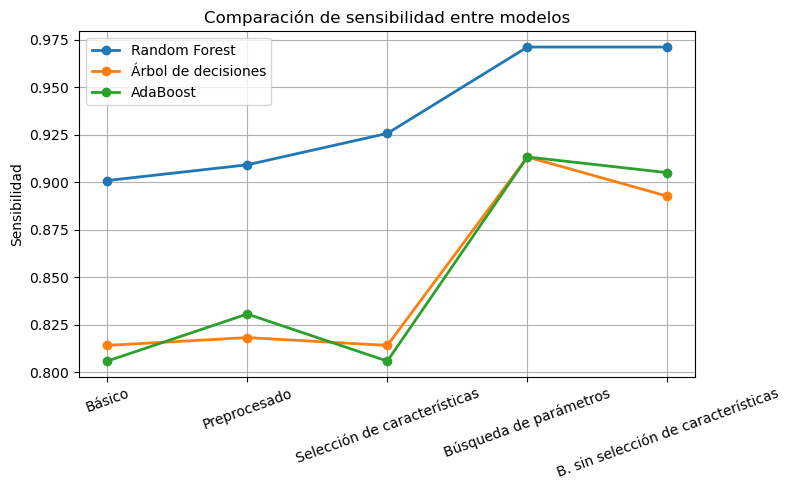

In [53]:
# Extraer la sensibilidad de cada modelo en cada etapa
sensibilidadDT = [
    scoresDTBasico[2],
    scoresDTOutliers[2],
    scoresDTSeleccion[2],
    scoresDTGridSearch[2],
    scoresDTGridSearchSinRed[2]
]
sensibilidadRF = [
    scoresRFBasico[2],
    scoresRFOutliers[2],
    scoresRFSeleccion[2],
    scoresRFGridSearch[2],
    scoresRFGridSearchSinRed[2]
]

sensibilidadAda = [
    scoresAdaBasico[2],
    scoresAdaOutliers[2],
    scoresAdaSeleccion[2],
    scoresAdaGridSearch[2],
    scoresAdaGridSearchSinRed[2]
]

nombres = [
    "Básico",
    "Preprocesado",
    "Selección de características",
    "Búsqueda de parámetros",
    "B. sin selección de características"
]

# --- Gráfica ---
plt.figure(figsize=(8,5))
plt.plot(nombres, sensibilidadRF, marker='o', linewidth=2)
plt.plot(nombres, sensibilidadDT, marker='o', linewidth=2)
plt.plot(nombres, sensibilidadAda, marker='o', linewidth=2)
plt.legend(["Random Forest", "Árbol de decisiones", "AdaBoost"])
plt.title("Comparación de sensibilidad entre modelos")
plt.ylabel("Sensibilidad")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

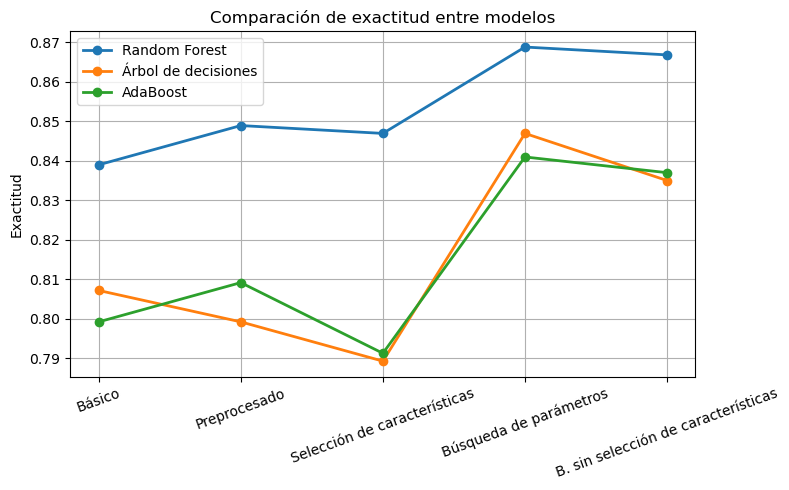

In [54]:
# Extraer la sensibilidad de cada modelo en cada etapa
exactitudDT = [
    scoresDTBasico[0],
    scoresDTOutliers[0],
    scoresDTSeleccion[0],
    scoresDTGridSearch[0],
    scoresDTGridSearchSinRed[0]
]
exactitudRF = [
    scoresRFBasico[0],
    scoresRFOutliers[0],
    scoresRFSeleccion[0],
    scoresRFGridSearch[0],
    scoresRFGridSearchSinRed[0]
]

exactitudAda = [
    scoresAdaBasico[0],
    scoresAdaOutliers[0],
    scoresAdaSeleccion[0],
    scoresAdaGridSearch[0],
    scoresAdaGridSearchSinRed[0]
]

nombres = [
    "Básico",
    "Preprocesado",
    "Selección de características",
    "Búsqueda de parámetros",
    "B. sin selección de características"
]

# --- Gráfica ---
plt.figure(figsize=(8,5))
plt.plot(nombres, exactitudRF, marker='o', linewidth=2)
plt.plot(nombres, exactitudDT, marker='o', linewidth=2)
plt.plot(nombres, exactitudAda, marker='o', linewidth=2)
plt.legend(["Random Forest", "Árbol de decisiones", "AdaBoost"])
plt.title("Comparación de exactitud entre modelos")
plt.ylabel("Exactitud")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparativa con la Parte 1

En los dátos de test de la parte 1 el mejor modelo conseguía un 87% en sensibilidad y un 83% en exactitud siendo este el random forest, nuestro modelo ahora mejora esos resultados en 10% la sensibilidad y en 3% la exactitud 

# Conclusión

Con el nuevo dataset podemos ver que la mejor métrica en el conjunto de test la consigue el modelo de Random Forest con un 97% de sensibilidad mientras que en entrenamiento este modelo consiguió un 95% en esta métrica, en exactitud consigue un 86% en datos de test y un 88% en datos de entrenamiento, datos mejores tambien que los otros modelos. Hemos conseguido entrenar en random forest un modelo que predice el 86% de los casos en los que hay bullying o no lo hay. Que además consigue más falsos positivos, ya que se considera mejor predecir que un alumno sufre bullying y que realmente no sea así que el caso contrario de que un alumno sufra bullying y que se prediga que no. Esta tolerancia en los falsos positivos nos permite ceñirnos mejor a este problema que si solo usáramos la precisión o la exactitud y permitiéramos más falsos negativos. Los modelos de AdaBoost y Arboles de decisión son bastante parecidos en sus resultados se podría destacar que la exactitud de los árboles de decisión empeoran cuando se realiza el preprocesado, mientras que los demás modelos mejoran con el preprocesado. también se puede destacar que la eliminación de características solo mejora a Random Forest. Y el ajuste de Hiperparametros consigue mejorar todos los resultados entorno a un 10% para Arboles de decisión y AdaBoost y entorno a un 2% a Random Forest. Es cierto que Random Forest ya partía con mejores resultados en este dataset, no como en el anterior que empezó obteniendo los peores resultados. Probablemente debido al desbalanceo del dataset original. Tambien conseguimos que funcione mejor porque hacemos la selección de características en base a el, lo que puede inducir un sesgo a los demas modelos. Si nos fijamos en las gráficas podemos ver que la reducción de características empeora el resultado en AdaBoost que se benefícia de tener más características, pero si que mejora en el árbol de decisión por eliminar ruido. 

En cuanto a las características más importantes que deberían de recabar serían las siguientes según el orden de importancia para predecir con el modelo Random Forest:

1. Ansiedad 
2. Tiempo_Internet 
3. Autoestima 
4. Notas_Promedio 
5. Tiempo_Redes 
6. Horas_Sueno 
7. Numero_Amigos 
8. Conflictos_Familiares 
9. Depresion 
10. Actividad_Fisica 
11. Tiempo_Videojuegos 
12. Ausencias_Escolares 
13. Edad 
14. Actividades_Extracurr 
15. Tipo_Centro_Publico 
16. Genero_Masculino 

La ``Ansiedad``, ``Tiempo_Internet``, ``Autoestima``, ``Notas_Promedio``, ``Tiempo_Redes`` parecen ser las más importantes en ese orden. Las características que menos afectan serían ``Genero_Masculino``, ``Tipo_Centro_Publico``, ``Actividades_Extracurr``, ``Edad`` y ``Ausencias_escolares``. En caso de tener que priorizar que datos medir utilizaría el Top puesto anteriormente. 


# Consultas IA Generativa



**Prompt:** Apartir del siguiente código para selección de características, genera un bucle que aplique el algoritmo con cada número de variables, genera una visualización para cada número de variables con la sensibilidad. Para aplicar el método del codo para la selección de características.
```Python
from sklearn.pipeline import Pipeline 
from sklearn.feature_selection 
import RFE 
n_features_to_select = 3
rfe = RFE(RandomForestClassifier(random_state=semilla), n_features_to_select=n_features_to_select) 
model = RandomForestClassifier(random_state=semilla)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)
print('Sensibilidad: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
```

**Respuesta:**
```Python
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

semilla = 42
resultados = []
num_features = []

# Número total de características
total_features = X_train.shape[1]

# Evaluamos desde 1 hasta todas las variables
for k in range(1, total_features + 1):

    # RFE seleccionando k características
    rfe = RFE(RandomForestClassifier(random_state=semilla),
              n_features_to_select=k)

    # Pipeline: RFE + modelo final
    model = RandomForestClassifier(random_state=semilla)
    pipeline = Pipeline([('rfe', rfe), ('model', model)])

    # Validación cruzada
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=semilla)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='recall',
                             cv=cv, n_jobs=-1)

    resultados.append(np.mean(scores))
    num_features.append(k)

    print(f"Características: {k}, Sensibilidad: {np.mean(scores):.4f}")

# --- Gráfica del método del codo ---
plt.figure(figsize=(8,5))
plt.plot(num_features, resultados, marker='o')
plt.xlabel("Número de características seleccionadas (k)")
plt.ylabel("Sensibilidad (Recall)")
plt.title("Método del codo para selección de características (RFE)")
plt.grid(True)
plt.show()
```

**Validación y cambios:** De este resultado se modifico para utilizar 2 métricas y se comprobo que se ajustaba al código original que se le paso como base.

**Prompt:** haz un viisualización de mathplotlib con el istograma de bulliying2['Autoestima'] y bulliying2['Ansiedad']
**Respuesta:** 
```Python
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Histograma de Autoestima
plt.subplot(1,2,1)
plt.hist(bullying2['Autoestima'], bins=20, edgecolor='black')
plt.title("Histograma de Autoestima")
plt.xlabel("Autoestima")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)

# Histograma de Ansiedad
plt.subplot(1,2,2)
plt.hist(bullying2['Ansiedad'], bins=20, edgecolor='black', color='orange')
plt.title("Histograma de Ansiedad")
plt.xlabel("Ansiedad")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

```


# Versión de Sklearn y Sinfo

In [55]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.7 | packaged by conda-forge | (main, Dec 23 2023, 14:27:59) [MSC v.1937 64 bit (AMD64)]
executable: c:\Users\AntonioLuisTorres\.conda\envs\NuCLS-tfg\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.7.2
          pip: 24.0
   setuptools: 69.0.3
        numpy: 1.26.3
        scipy: 1.12.0
       Cython: 3.0.8
       pandas: 2.2.0
   matplotlib: 3.8.2
       joblib: 1.3.2
threadpoolctl: 3.3.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 6
         prefix: libblas
       filepath: C:\Users\AntonioLuisTorres\.conda\envs\NuCLS-tfg\Library\bin\libblas.dll
        version: 2024.0-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\Users\AntonioLuisTorres\.conda\envs\NuCLS-tfg\vcomp140.dll
        version: None

       user_api: openmp
   internal_api: openmp
    num_threads: 12
  

In [56]:
from sinfo import sinfo

sinfo()

-----
matplotlib  3.8.2
numpy       1.26.3
pandas      2.2.0
scipy       1.12.0
sinfo       0.3.1
sklearn     1.7.2
-----
IPython             8.22.1
jupyter_client      8.6.0
jupyter_core        5.7.1
jupyterlab          4.1.2
notebook            7.1.1
-----
Python 3.11.7 | packaged by conda-forge | (main, Dec 23 2023, 14:27:59) [MSC v.1937 64 bit (AMD64)]
Windows-10-10.0.19045-SP0
12 logical CPU cores, Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
-----
Session information updated at 2025-11-20 00:41
